***Importing the data***

In [55]:
#Importing the data
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot


In [14]:
series = pd.read_csv('exchange_rate.csv',parse_dates=True)
series.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [8]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


***Assinging Date column as date***

In [15]:
series = pd.read_csv('exchange_rate.csv', header=0, index_col=0,parse_dates=True)
series.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


***Data Visualisation***

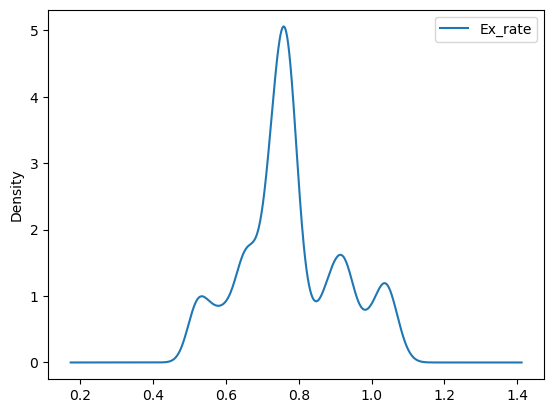

In [16]:
series.plot(kind='kde')
plt.show()

In [11]:
from pandas import read_csv
from matplotlib import pyplot

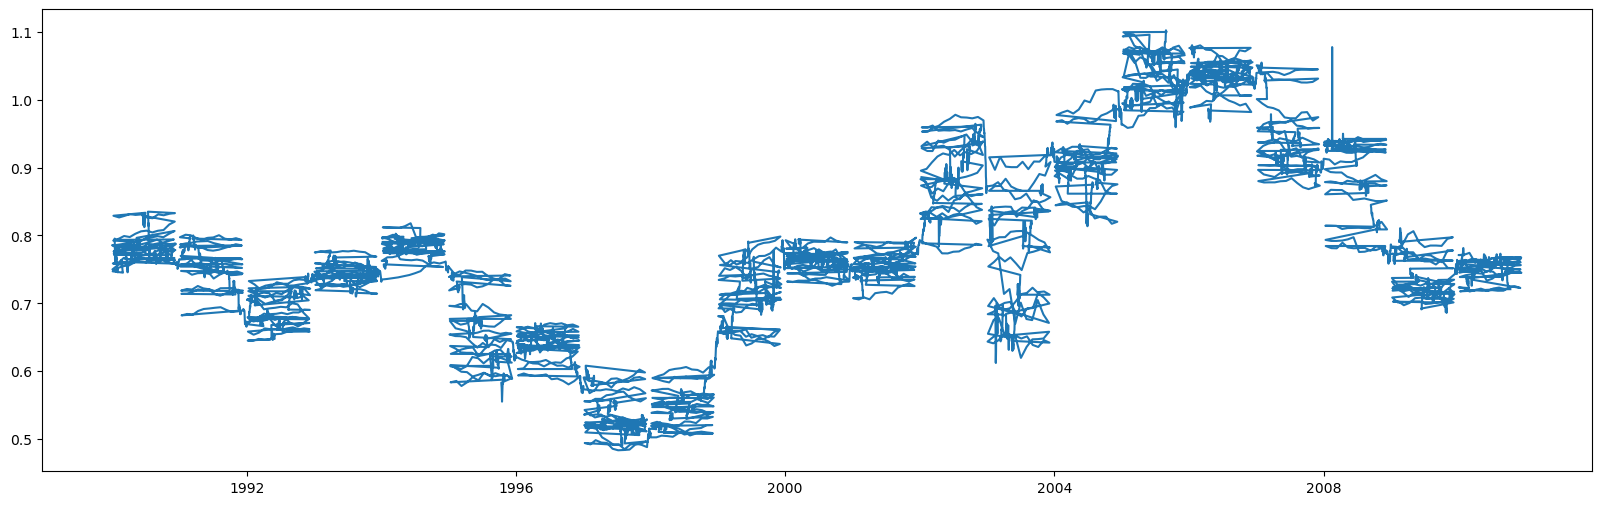

In [17]:
plt.figure(figsize=(20,6))
plt.plot(series)

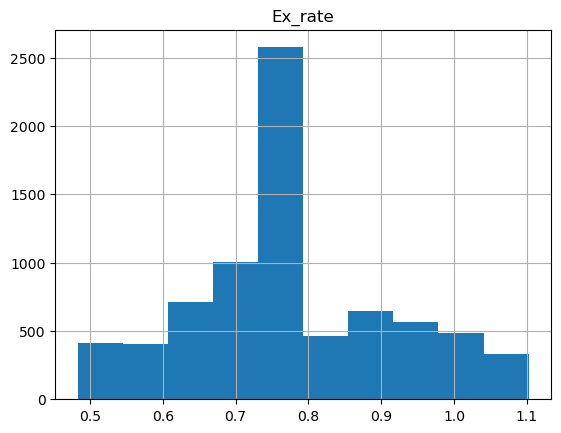

In [17]:
series.hist()
pyplot.show()

***Box and Whisker Plots by Interval***

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed3e513910>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed3e501950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed3e511b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed3e509350>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed3e501e50>],
 'means': []}

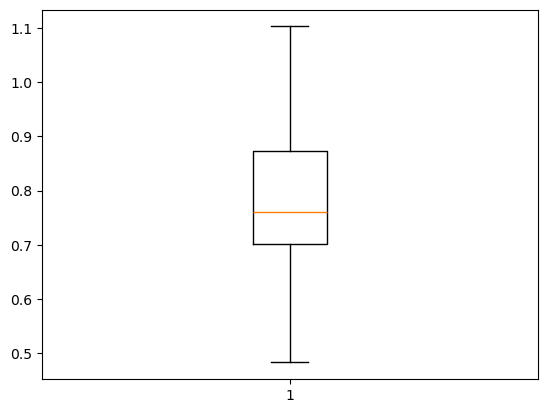

In [18]:
plt.boxplot(series)

<Axes: xlabel='date', ylabel='Ex_rate'>

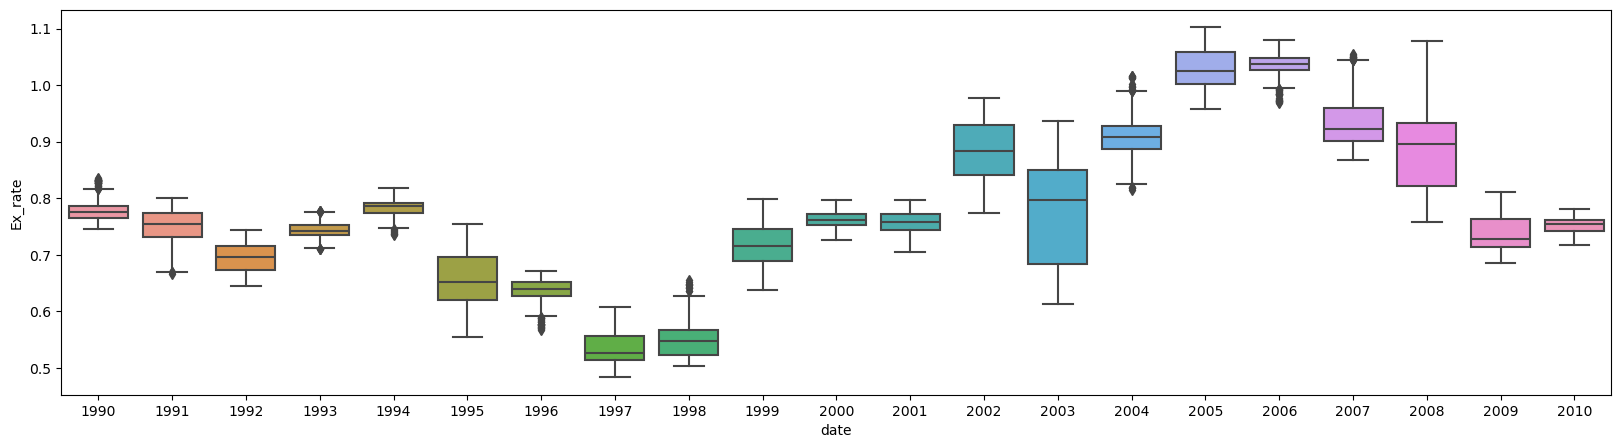

In [18]:
fig,ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = series.index.year, 
                y = series.Ex_rate, 
                ax = ax)

<Axes: xlabel='date', ylabel='Ex_rate'>

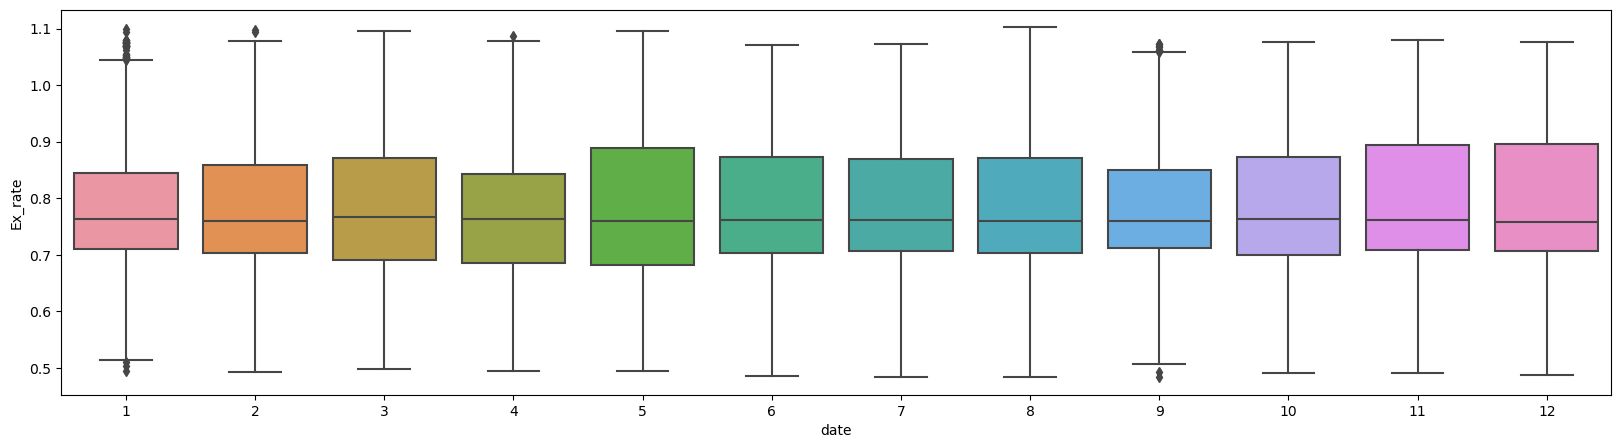

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = series.index.month, 
                y = series.Ex_rate, 
                ax = ax)

In [22]:
series.index = pd.to_datetime(series.index)

In [23]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB



from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series, lag=20)
pyplot.show()

<Figure size 4000x1000 with 0 Axes>

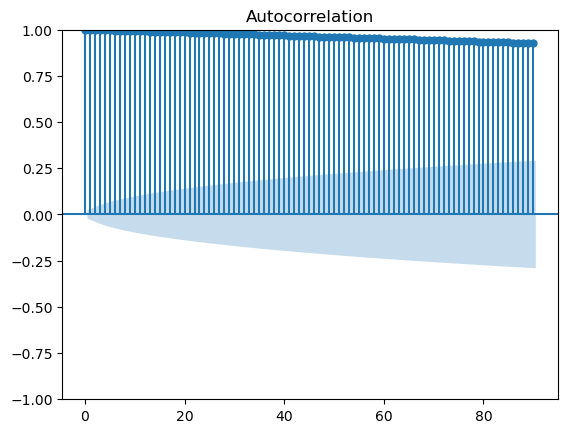

In [25]:
# create an autocorrelation plot
pyplot.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series,lags=90)
pyplot.show()

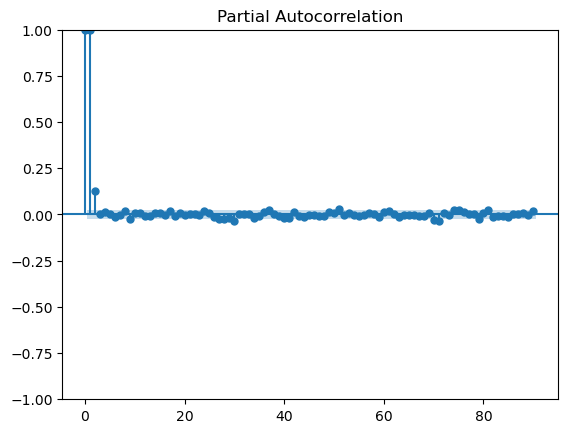

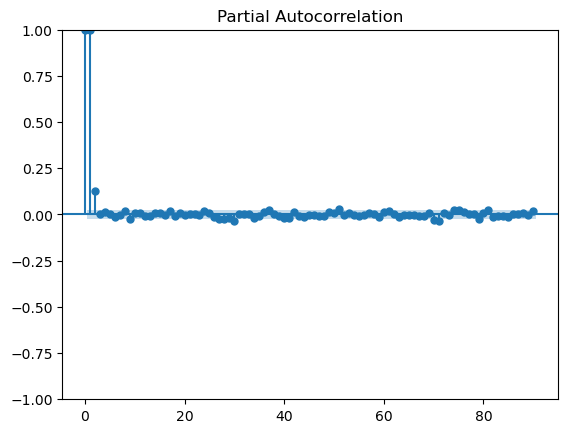

In [26]:
plot_pacf(series,lags=90)

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt's-Winter model
import matplotlib.pyplot as plt


**Exponential Smoothing**

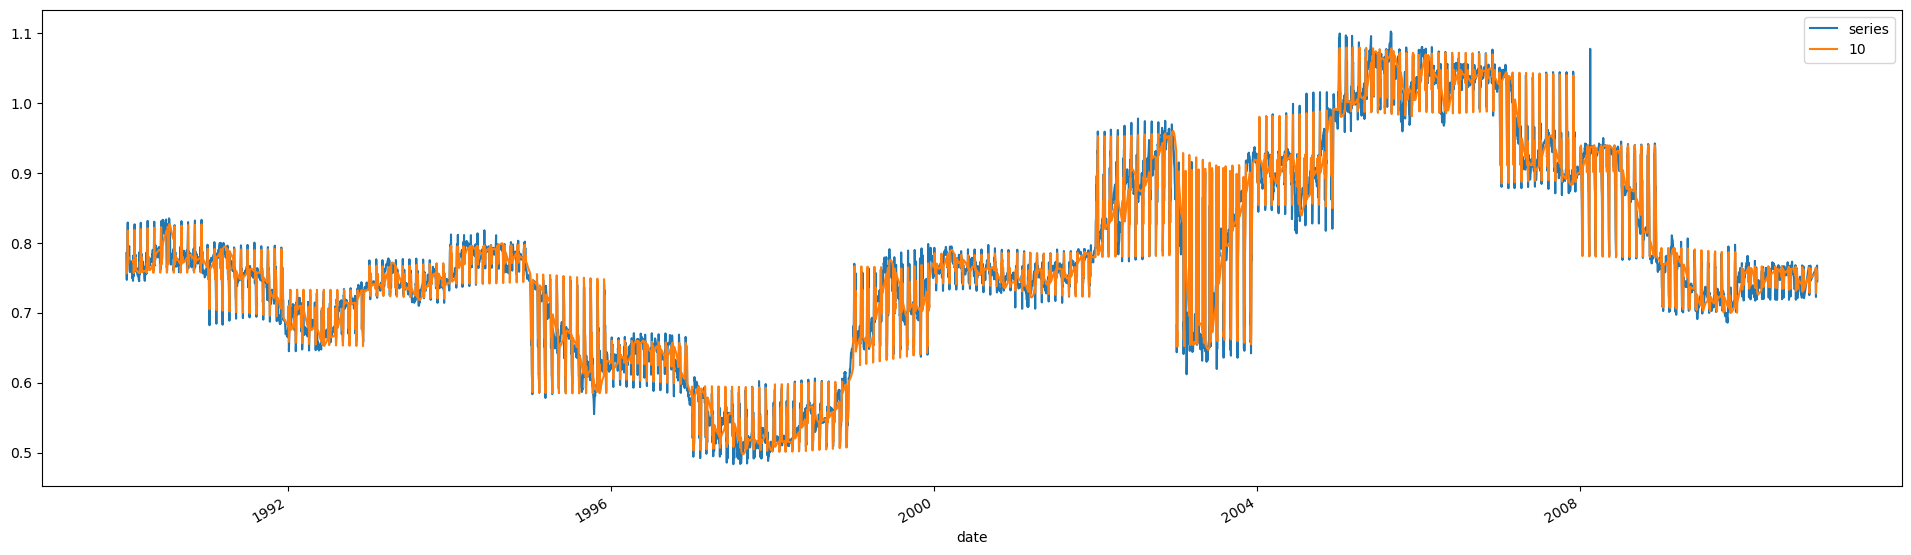

In [21]:
plt.figure(figsize=(24,7))
series.Ex_rate.plot(label="series")
pred = pd.DataFrame()
pred["Moving_Avg"] = series["Ex_rate"].rolling(30).mean()
pred["Moving_Avg"].plot(label=str(10))
plt.legend(loc='best')

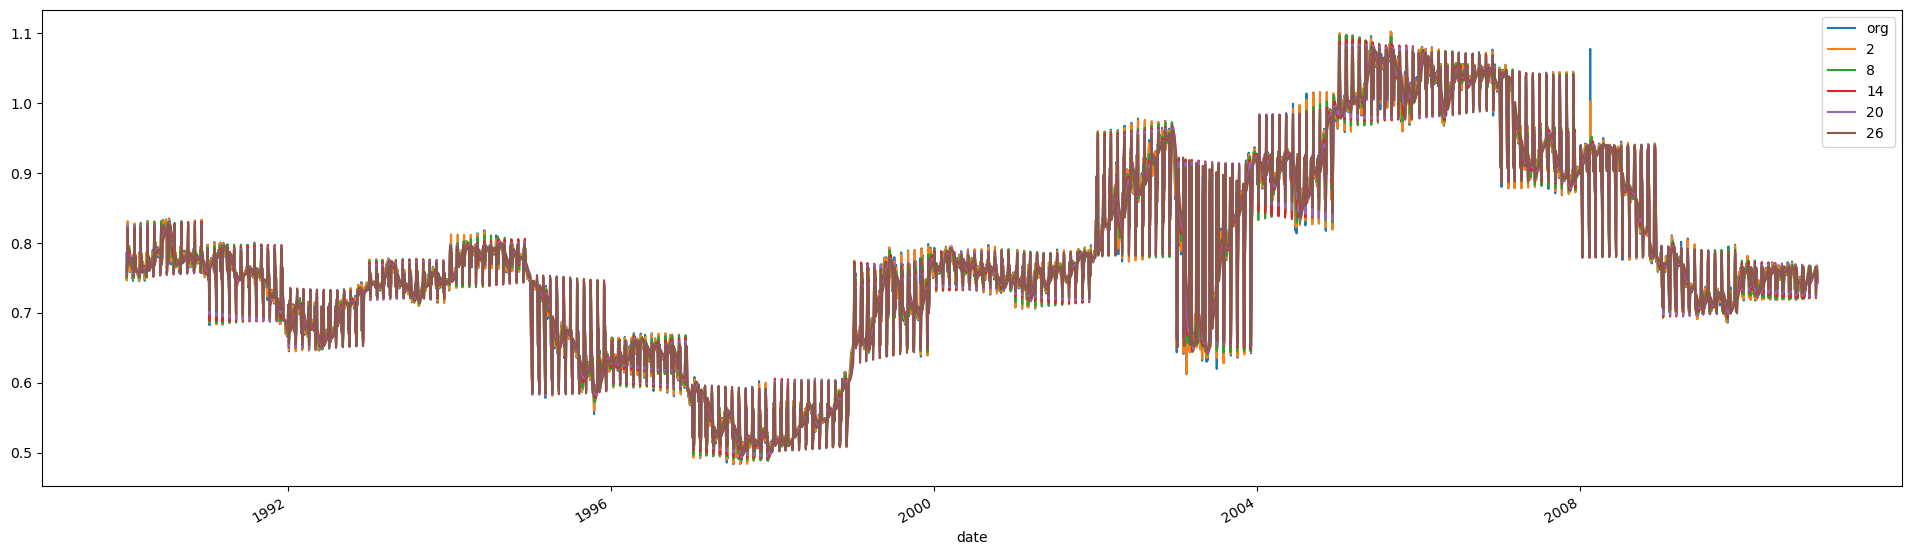

In [22]:
plt.figure(figsize=(24,7))
series.Ex_rate.plot(label="org")
for i in range(2,30,6):
    series["Ex_rate"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

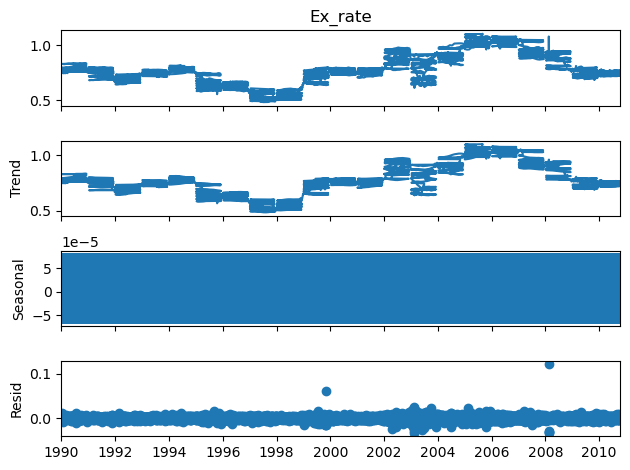

In [26]:
decompose_ts_add = seasonal_decompose(series.Ex_rate,period= 5)
decompose_ts_add.plot()
plt.show()

In [28]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [62]:
series1 = pd.read_csv('exchange_rate.csv',parse_dates=True)
series1.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [63]:
Train = series1.head(6000)
Test = series1.tail(1588)


In [64]:
Train.head(10)

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849
5,06-01-1990 00:00,0.7866
6,07-01-1990 00:00,0.7886
7,08-01-1990 00:00,0.7910
8,09-01-1990 00:00,0.7939
9,10-01-1990 00:00,0.7894


In [65]:
Test.head()

,date,Ex_rate
6000,06-06-2006 00:00,1.037990
6001,07-06-2006 00:00,1.037947
6002,08-06-2006 00:00,1.026694
6003,09-06-2006 00:00,1.022735
6004,10-06-2006 00:00,1.031800


In [66]:
import numpy as np

In [67]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [69]:
hwe_model_mul_add = ExponentialSmoothing(Train["Ex_rate"],seasonal="mul",trend="additive",seasonal_periods=12).fit() 
pred_hwe_mul_add = pd.DataFrame()
pred_hwe_mul_add["holt_winter_mul"] = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add["holt_winter_mul"] ,Test.Ex_rate)

27.211206211543672

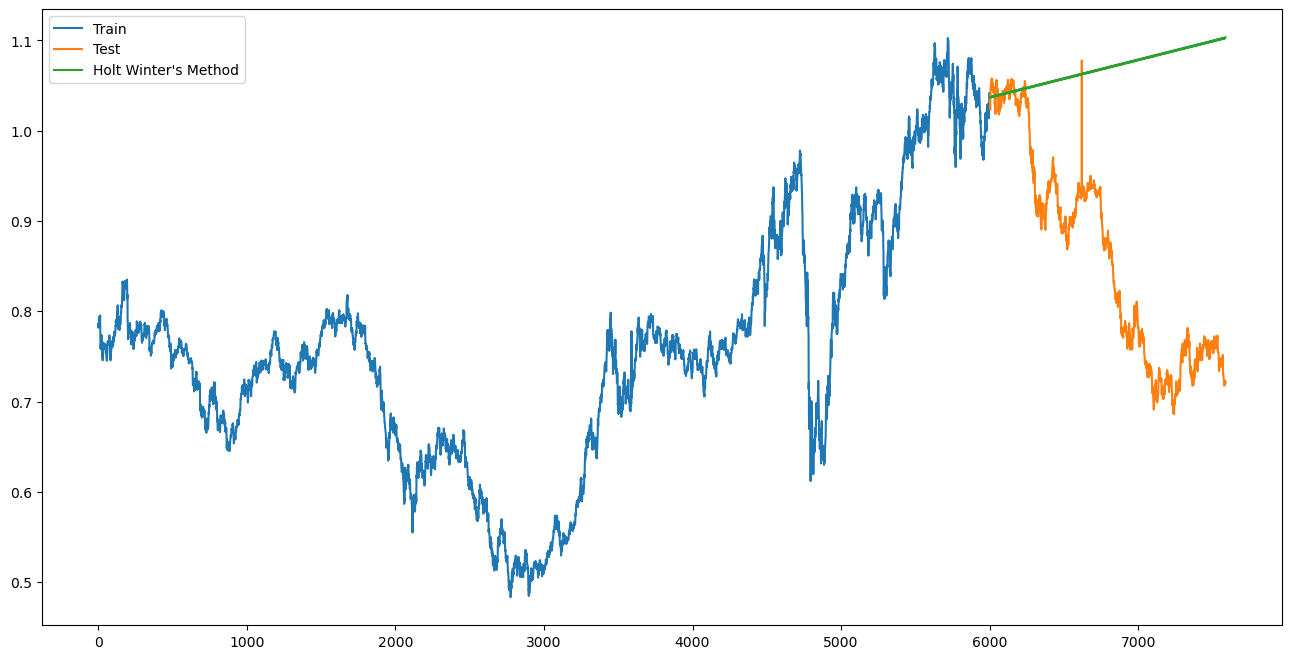

In [70]:
plt.figure(figsize=(16,8))
plt.plot(Train["Ex_rate"], label='Train')
plt.plot(Test["Ex_rate"], label='Test')
plt.plot(pred_hwe_mul_add["holt_winter_mul"], label="Holt Winter's Method")
plt.legend(loc='best')
plt.show()

In [71]:
pred_hwe_mul_add["holt_winter_mul"]

6000    1.036884
6001    1.037188
6002    1.037252
6003    1.037530
6004    1.037466
          ...   
7583    1.102509
7584    1.102669
7585    1.102990
7586    1.103055
7587    1.103348
Name: holt_winter_mul, Length: 1588, dtype: float64

In [72]:
hwe_model_add_add = ExponentialSmoothing(series.Ex_rate,seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [73]:
#Forecasting for next 10 time periods
future_data = hwe_model_add_add.forecast(10)
future_data

C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


7588    0.720813
7589    0.720595
7590    0.720260
7591    0.720518
7592    0.720357
7593    0.720480
7594    0.720540
7595    0.720245
7596    0.720426
7597    0.720467
dtype: float64

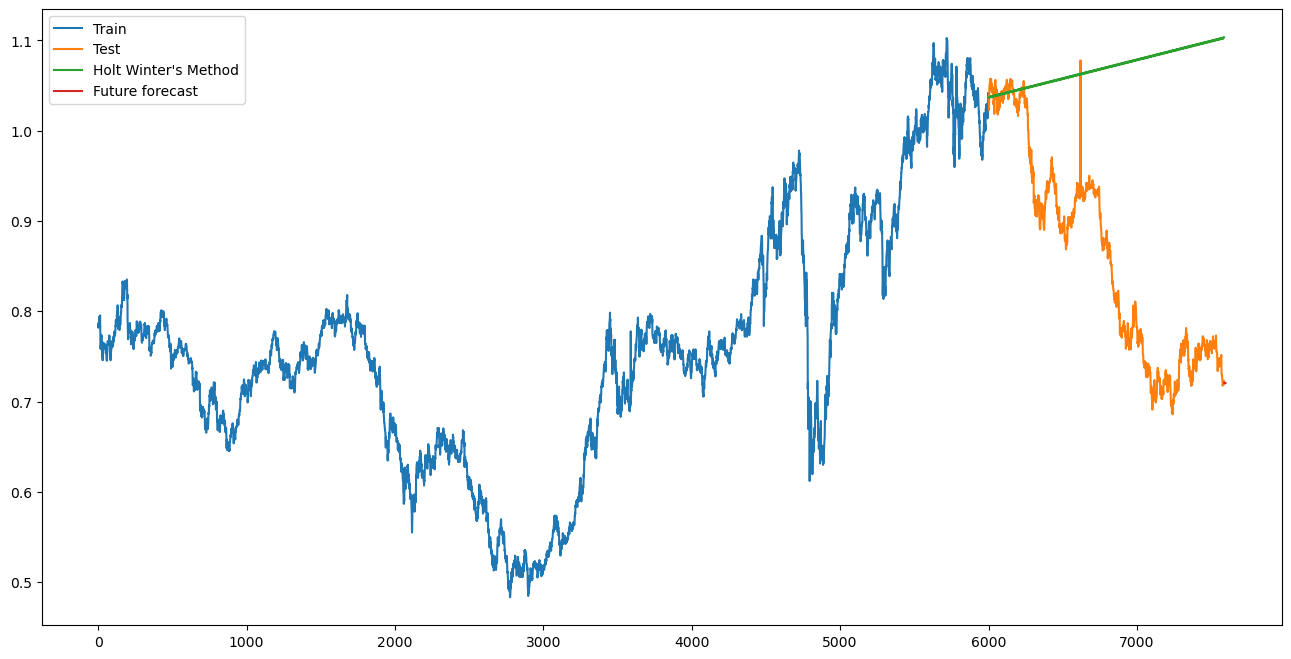

In [74]:
plt.figure(figsize=(16,8))
plt.plot(Train["Ex_rate"], label='Train')
plt.plot(Test["Ex_rate"], label='Test')
plt.plot(pred_hwe_mul_add["holt_winter_mul"], label="Holt Winter's Method")
plt.plot(future_data, label="Future forecast")
plt.legend(loc='best')
plt.show()

***ARIMA Model***

In [ ]:
# Import libraries

from matplotlib import pyplot
import warnings
import numpy
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [77]:
series2 = pd.read_csv('exchange_rate.csv', header=0, index_col=0, parse_dates=True)

In [78]:
series2

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [79]:
# Augmented Dickey-Fuller (ADF) test
# h0 : The series is non-stationary
# ha : The series is stationary
# import the adfuller function from statsmodel package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# extracting values from data frame
values = series2.values

# passing the extracted values to adfuller function.
res = adfuller(values)
print(res)
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f'  %res[1])

# printing the critical values at different alpha levels and the result of the test.
print('critical values at different levels:')
for k, v in res[4].items():
    print (k, v)
if (res[1] > 0.025):
    print("The time series is non-stationary")

(-1.6649941807381343, 0.44923273535979974, 1, 7586, {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}, -55835.06254628545)
Augmneted Dickey_fuller Statistic: -1.664994
p-value: 0.449233
critical values at different levels:
1% -3.4312123140180137
5% -2.861921078147796
10% -2.5669728434336108
The time series is non-stationary


             Ex_rate
date                
1990-01-01       NaN
1990-02-01 -0.003700
1990-03-01  0.004900
1990-04-01 -0.000700
1990-05-01 -0.001100
...              ...
2010-06-10 -0.000207
2010-07-10  0.003345
2010-08-10  0.001358
2010-09-10 -0.002372
2010-10-10  0.000000

[7588 rows x 1 columns]
0.0
p value:0.0 , Series is Stationary


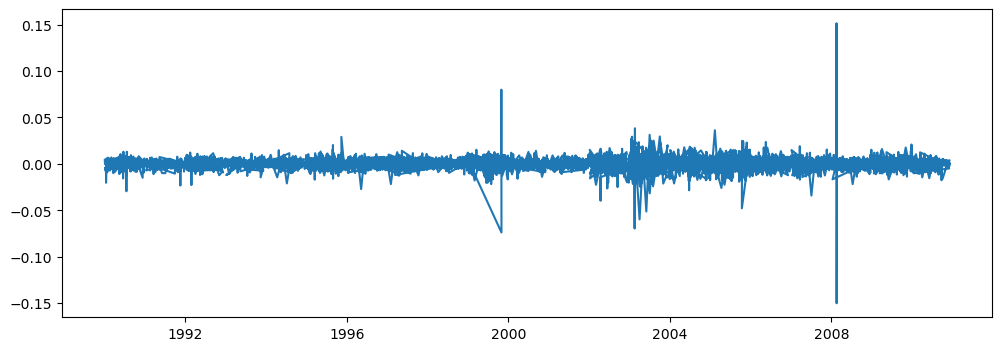

In [80]:
#De-trending with first order differencing
data1 = pd.DataFrame(series2["Ex_rate"].diff())
print(data1)
de_trended = data1.dropna()
adf2 = adfuller(de_trended.values)[1]
print(adf2)
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
plt.figure(figsize = (12,4))
plt.plot(de_trended);
plt.show()

In [82]:
# separate out a validation dataset
split_point = len(series2) - 10
train, validation = series2[0:split_point], series2[split_point:]
#print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
# dataset.to_csv('dataset.csv', header=True)
validation.to_csv('validation.csv', header=True)

In [83]:
X = train.values
X = X.astype('float32')

In [84]:
X

array([[0.7855  ],
       [0.7818  ],
       [0.7867  ],
       ...,
       [0.725058],
       [0.724506],
       [0.721553]], dtype=float32)

In [85]:
validation

,Ex_rate
date,
2010-01-10,0.717618
2010-02-10,0.719114
2010-03-10,0.719114
2010-04-10,0.719735
2010-05-10,0.718701
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197
2010-09-10,0.720825


In [86]:
# fit model
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)
forecast

array([0.72185223, 0.72159792, 0.72181988, 0.72194978, 0.72172972,
       0.72166762, 0.72187395, 0.72187982, 0.72169864, 0.72173589])

In [87]:
forecastdata = pd.DataFrame()
forecastdata["forecasted_val"] = forecast

In [88]:
forecastdata

,forecasted_val
0,0.721852
1,0.721598
2,0.721820
3,0.721950
4,0.721730
5,0.721668
6,0.721874
7,0.721880
8,0.721699
9,0.721736


In [89]:
Ex_rate1 = pd.concat([series2,forecastdata], ignore_index=True)

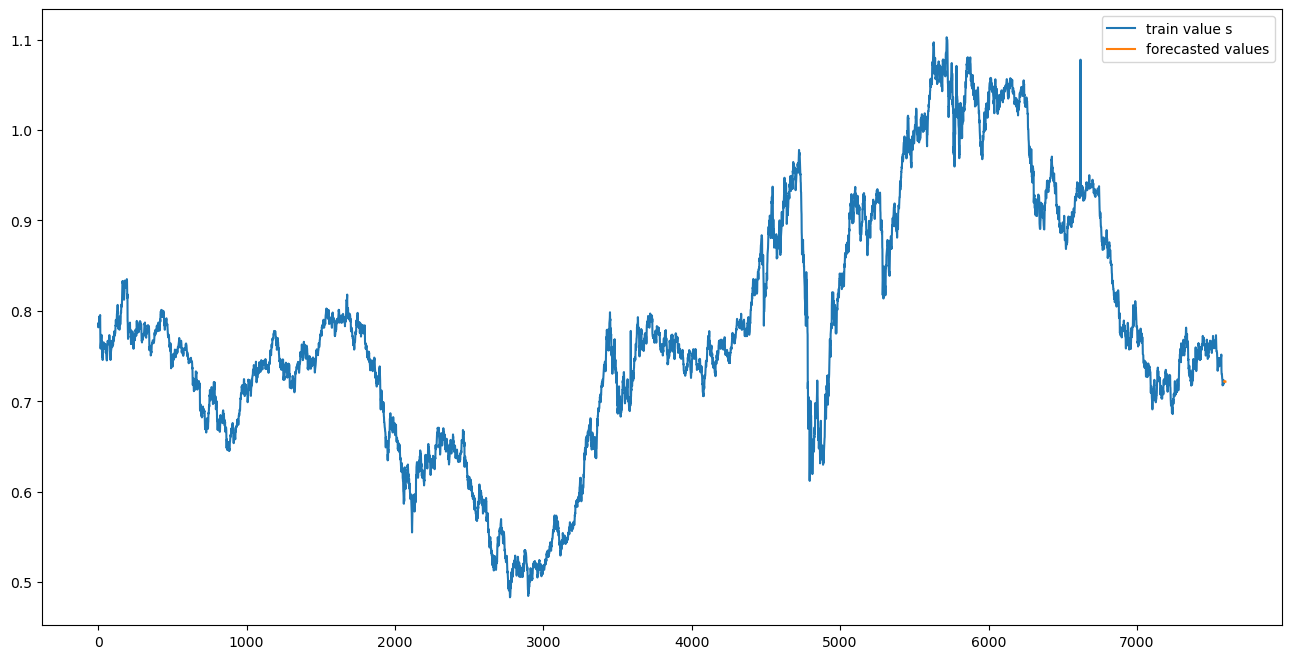

In [91]:
plt.figure(figsize=(16,8))

plt.plot(Ex_rate1["Ex_rate"], label='train value s')
plt.plot(Ex_rate1["forecasted_val"], label="forecasted values")
plt.legend(loc='best')
plt.show()